In [2]:
import numpy as np
import pandas as pd
import glob
from astropy.table import Table
import matplotlib.pyplot as plt
import json 
import collections
import astropy

import astropy.units as u
from astropy.time import Time
from astropy.coordinates import SkyCoord, EarthLocation, AltAz
import matplotlib.ticker as plticker

from astropy.io import fits
from astropy.io import ascii

In [3]:
from astroplan.plots import plot_airmass
from astroplan import Observer
from astroplan import FixedTarget
from astroplan import (AltitudeConstraint, AirmassConstraint,
                       AtNightConstraint)
from astroplan import is_observable, is_always_observable, months_observable
observer = Observer.at_site('palomar')
from astroplan import EclipsingSystem

In [9]:
start_observing_time = Time('2023-05-13 03:41')
end_observing_time = Time('2023-05-13 11:49')
midnight = Time('2023-05-13 07:00')
midnight_mjd = midnight.mjd
(end_observing_time-start_observing_time).to_datetime()
time_array = np.linspace(0, 29280, 2929) * u.second
obs_period = (start_observing_time + time_array).to_value('mjd', 'long')
obs_period

array([60077.15347222, 60077.15358796, 60077.1537037 , ...,
       60077.49212963, 60077.49224537, 60077.49236111], dtype=float128)

In [10]:
J184951 = np.load("J184951.npy", allow_pickle=True)[0]
J183118 = np.load("J183118.npy", allow_pickle=True)[0]
J204638 = np.load("J204638.npy", allow_pickle=True)[0]
J163045 = np.load("J163045.npy", allow_pickle=True)[0]
J210017 = np.load("J210017.npy", allow_pickle=True)[0]
targets = [J184951, J183118, J204638]

In [11]:
def observable(object, time): # 0 for no, 2 for primary, 1 for secondary
    time_utc = Time(time, format="mjd")
    primary = object.next_primary_eclipse_time(time_utc, n_eclipses = 100)
    secondary = object.next_secondary_eclipse_time(time_utc, n_eclipses = 100)
    for i in primary:
        start_mjd = i.to_value('mjd', 'long')
        end_mjd = (i + object.duration).to_value('mjd', 'long')
        if (start_mjd < time and time < end_mjd):
            return 2
    for i in secondary:
        start_mjd = i.to_value('mjd', 'long')
        end_mjd = (i + object.duration).to_value('mjd', 'long')
        if (start_mjd < time and time < end_mjd):
            return 1

In [12]:
obs_period

array([60077.15347222, 60077.15358796, 60077.1537037 , ...,
       60077.49212963, 60077.49224537, 60077.49236111], dtype=float128)

0.015835691070023295 d
0.015835691070023295 d
0.028303767659799695 d
0.005378566043276792 d
0.005378566043276792 d


Text(0.5, 0, 'Hours Since Midnight')

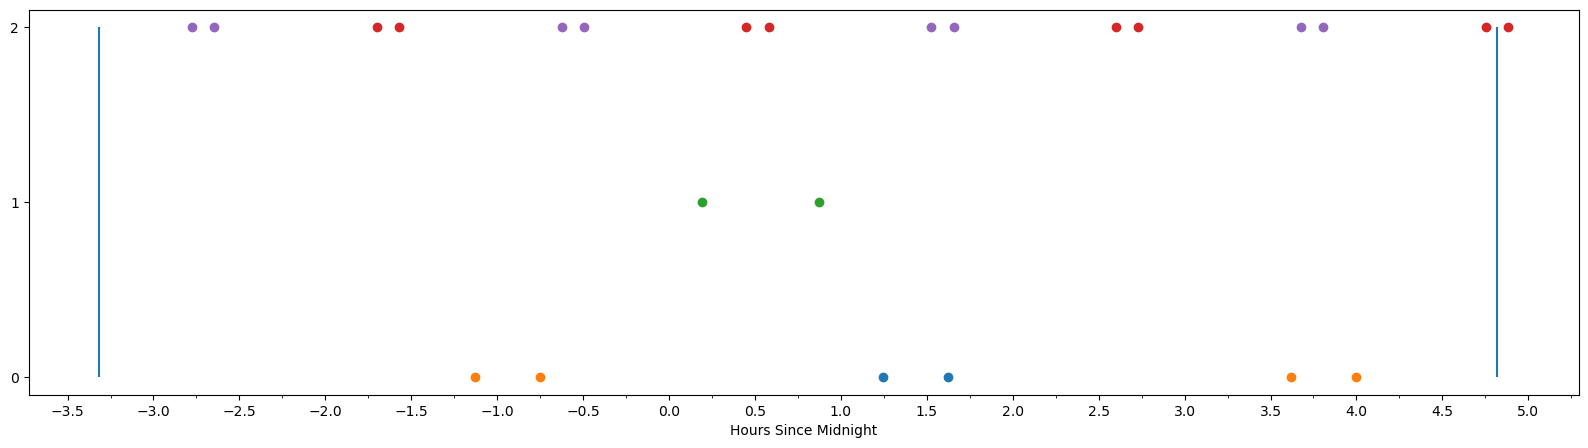

In [19]:
fig, ax = plt.subplots(figsize=(20,5))
for j in range(len(targets)):
    t = targets[j]
    primary_s = t.next_primary_eclipse_time(start_observing_time, n_eclipses = 100)
    primary_s = primary_s[primary_s < end_observing_time]
    times = []
    for i in primary_s:
        times.extend([i, i + t.duration])
    if(len(times) > 0):
        times = Time(times)
        print(t.duration)
        ax.scatter((times.mjd - midnight_mjd)*24, j * np.ones(2 * len(primary_s)))

    secondary_s = t.next_secondary_eclipse_time(start_observing_time, n_eclipses = 100)
    secondary_s = secondary_s[secondary_s < end_observing_time]
    times = []
    for i in secondary_s:
        times.extend([i, i + t.duration])
    if(len(times) > 0):
        times = Time(times)
        print(t.duration)
        ax.scatter((times.mjd - midnight_mjd)*24, j * np.ones(2 * len(secondary_s)))
ax.vlines((start_observing_time.mjd - midnight_mjd)*24, 0, 2)
ax.vlines((end_observing_time.mjd - midnight_mjd)*24, 0, 2)
ax.xaxis.set_major_locator(plticker.MultipleLocator(base = 0.5))
ax.yaxis.set_major_locator(plticker.MultipleLocator(base = 1))
ax.xaxis.set_minor_locator(plticker.MultipleLocator(base = 0.25))
#plt.xlim(1, 5)
plt.xlabel("Hours Since Midnight")

In [17]:
secondary_s

<Time object: scale='utc' format='iso' value=[]>